# Input data file

In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
Path_data='C:\\Users\\wanli\\Desktop\\DS Homework\\indeed_data_science_exercise\\'
train_feature=Path_data+'train_features_2013-03-07.csv'
train_label=Path_data+'train_salaries_2013-03-07.csv'
test_feature=Path_data+'test_features_2013-03-07.csv'
test_label=Path_data+'test_salaries.csv'
Tdf=pd.read_csv(train_feature)
Train_label_df=pd.read_csv(train_label)
Tdf['salary']=Train_label_df['salary']#merge label into data for further data cleaning
Testdf=pd.read_csv(test_feature)

Test_label_df=pd.read_csv(test_label)
Testdf['salary']=Test_label_df['salary']

Analysis Data

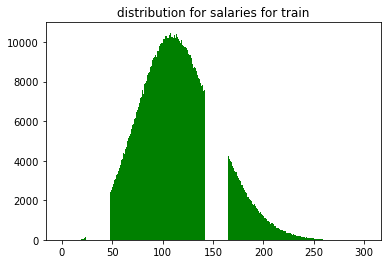

In [243]:
Dic_salary=Counter(list(Train_label_df['salary']))
plt.figure()
plt.title('distribution for salaries for train')
plt.bar(list(Dic_salary.keys()), Dic_salary.values(), color='g')

plt.savefig('salary distribution')
plt.show()

In [244]:
aa=np.array(list(Test_label_df['salary']))

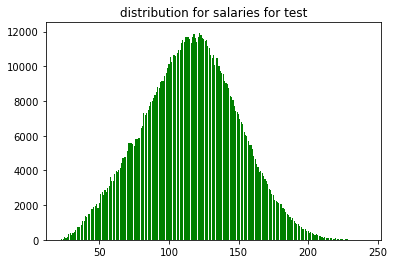

In [245]:

Dt_salary=Counter(aa.astype(int))
plt.title('distribution for salaries for test')
plt.bar(list(Dt_salary.keys()), Dt_salary.values(), color='g')
plt.show()

Preprocess data to get numerical feature ready for training

In [246]:
def NumericalFeature(Tdf):
    #Tdf['zeros']=pd.Series(np.zeros(Tdf.shape[0]))
    Tdf['zeros']=0*Tdf['milesFromMetropolis']
    degree_set=list(set(Tdf['degree']))
    print('0==========================================')
    for name in degree_set:
        col1='degree'+str(name)
        Tdf[col1]=Tdf['zeros'].copy()
        Tdf[col1].loc[Tdf.degree==str(name)]=1
        
    major_set=list(set(Tdf['major']))
    
    for name in major_set:
        col2='major'+str(name)
        Tdf[col2]=Tdf['zeros'].copy()
        Tdf[col2].loc[Tdf['major']==str(name)]=1
    industry_set=list(set(Tdf['industry']))   
    for name in industry_set:
        col3='industry'+str(name)
        Tdf[col3]=Tdf['zeros'].copy()  
        Tdf[col3].loc[Tdf.industry==str(name)]=1
    Jobtype_set=list(set(Tdf['jobType']))   
    for name in Jobtype_set:
        col4='jobType'+str(name)
        Tdf[col4]=Tdf['zeros'].copy()
        Tdf[col4].loc[Tdf.jobType==str(name)]=1
    print('1==========================================')
    Tdf.loc[:,'company']=Tdf['zeros'].copy()
    comid=list(map(lambda x:int(x.lstrip('COMP')),Tdf['companyId'].values ))
    Tdf['company']=np.array(comid)
    AllFeature=list(set(Tdf.columns)-set(['zeros']))
    print('2===================================================')
    Ready_df=Tdf[AllFeature].copy()
    Ready_df['company'].loc[:]=Ready_df['company'].values/100
    Ready_df['milesFromMetropolis'].loc[:]=Ready_df['milesFromMetropolis'].values/100
    Ready_df['yearsExperience'].loc[:]=Ready_df['yearsExperience'].values/10
    features = list(set(Ready_df.columns[:-1])-set(['salary','jobId','jobType','companyId','degree','major','industry']))
    return Ready_df,features

In [247]:
Tdf['salary'].describe(percentiles=[0.03,0.98])
lowb=Tdf['salary'].describe(percentiles=[0.03,0.98])[-4]
highb=Tdf['salary'].describe(percentiles=[0.03,0.98])[-2]
Tdf=Tdf.ix[Tdf['salary']>lowb]
NN=Tdf.ix[Tdf['salary']<highb]

In [248]:
Ready_df,features=NumericalFeature(NN)

C:\Users\wanli\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\wanli\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\wanli\Anaconda3\lib\site-packages\pandas\core\indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._

0==========================================


C:\Users\wanli\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\wanli\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\wanli\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\wanli\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: SettingWithCopyWarning: 
A

1==========================================


C:\Users\wanli\Anaconda3\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\wanli\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\wanli\Anaconda3\lib\site-packages\ipykernel\__main__.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

2===================================================


Dic_salary=Counter(list(Train_label_df['salary']))
plt.title('distribution for salaries')
plt.bar(list(Dic_salary.keys()), Dic_salary.values(), color='g')
plt.show()

In [249]:
#Create Training And Test Data
Ready_df['is_train'] = np.random.uniform(0, 1, len(Ready_df)) <= .75

In [250]:
train, test = Ready_df[Ready_df['is_train']==True], Ready_df[Ready_df['is_train']==False]

In [251]:
features = list(set(Ready_df.columns[:-1])-set(['salary','jobId','jobType','companyId','degree','major','industry']))
print(features)
y_train=train['salary']
X_train=train[features]
X_test=test[features]
y_test=test['salary']

['milesFromMetropolis', 'industryHEALTH', 'majorNONE', 'jobTypeJUNIOR', 'industryFINANCE', 'majorCOMPSCI', 'majorLITERATURE', 'industrySERVICE', 'industryOIL', 'yearsExperience', 'jobTypeCTO', 'majorBUSINESS', 'jobTypeVICE_PRESIDENT', 'majorCHEMISTRY', 'majorENGINEERING', 'jobTypeJANITOR', 'degreeDOCTORAL', 'degreeNONE', 'industryAUTO', 'jobTypeCFO', 'majorPHYSICS', 'degreeHIGH_SCHOOL', 'industryWEB', 'degreeBACHELORS', 'majorBIOLOGY', 'jobTypeSENIOR', 'company', 'majorMATH', 'degreeMASTERS', 'jobTypeMANAGER', 'industryEDUCATION', 'jobTypeCEO']


In [252]:
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
lm= linear_model.Lasso(alpha = 0.1)
lm.fit(X_train.fillna(0),y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [253]:
Train_pre=lm.predict(X_train.fillna(0))

In [254]:
X_train.columns.shape

(32,)

In [255]:
lm.coef_
Coef=dict()
for i in range(len(lm.coef_)):
    Coef[X_train.columns[i]]=lm.coef_[i]

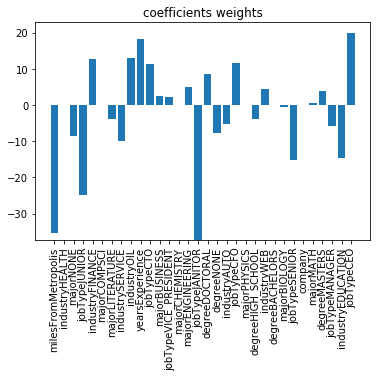

In [256]:
D=Coef
plt.figure()
plt.title('coefficients weights')
plt.bar(range(len(D)), D.values(), align='center')
plt.xticks(range(len(D)), D.keys(),rotation='vertical')
plt.savefig('coefficients')
plt.show()

In [258]:
np.mean((Train_pre-y_train)**2)

358.3759721349801

In [259]:
Test_pre=lm.predict(X_test.fillna(0))
np.mean((Test_pre-y_test)**2)

357.1285466213389

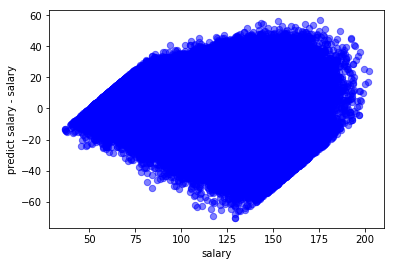

In [260]:
plt.figure()
plt.scatter(lm.predict(X_test[0:100000]),lm.predict(X_test[0:100000])-y_test[0:100000],c='b',s=40,alpha=0.5)
plt.xlabel('salary')
plt.ylabel('predict salary - salary')
plt.savefig('Scatter for distance between predict salary and real salary')
plt.show()

In [261]:
Testdata,features=NumericalFeature(Testdf)

0==========================================


C:\Users\wanli\Anaconda3\lib\site-packages\pandas\core\indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


1==========================================
2===================================================


In [264]:
#save predict data
MSE=np.mean((Test_label_df['salary']-lm.predict(Testdata[features]))**2)
Test_seriers=lm.predict(Testdata[features])
Test_label_df['salary'].loc[:]=pd.Series(Test_seriers)
Test_label_df.to_csv('predict_test.csv',index=False)

C:\Users\wanli\Anaconda3\lib\site-packages\pandas\core\indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [ ]:
Tsave=pd.DataFrame(columns=['jobId','salary'])
Tsave['jobId']=Test_label_df['jobId'].copy()
Tsave['salary']=Test_seriers


In [ ]:
Tsave.to_csv('predict_test.csv')